In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
x = np.linspace(0.*np.pi, 6.*np.pi,10000)
y = np.sin(x)
mean_absolute_v = np.mean(np.abs(y))
y_noisy = y + np.random.normal(loc=0.0, scale=0.1*mean_absolute_v,size=len(x))

In [11]:
firstD_clean = np.gradient(y,x)
secondD_clean = np.gradient(firstD_clean, x)

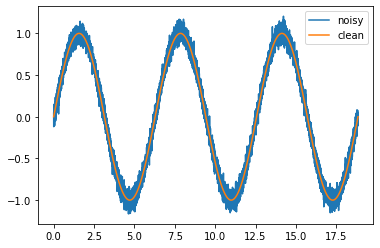

In [5]:
plt.plot(x,y_noisy, label='noisy')
plt.plot(x,y, label='clean')
plt.legend()

In [6]:
from DLTVR import DLTVR1D_Keras 

/mpcdf/soft/SLE_15/packages/skylake/tensorflow/gpu/anaconda_3_2019.03-2019.03-cuda_10.0-10.0.130/1.14.0/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/mpcdf/soft/SLE_15/packages/skylake/tensorflow/gpu/anaconda_3_2019.03-2019.03-cuda_10.0-10.0.130/1.14.0/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/mpcdf/soft/SLE_15/packages/skylake/tensorflow/gpu/anaconda_3_2019.03-2019.03-cuda_10.0-10.0.130/1.14.0/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a syn

In init py ['/talos/u/wangnisn/devel/deep_learning_total_variation_regularization', '', '/mpcdf/soft/SLE_15/packages/x86_64/keras/anaconda_3_2019.03-2019.03/2.3.1/lib/python3.7/site-packages', '/mpcdf/soft/SLE_15/packages/skylake/tensorflow/gpu/anaconda_3_2019.03-2019.03-cuda_10.0-10.0.130/1.14.0/lib/python3.7/site-packages', '/mpcdf/soft/SLE_15/packages/skylake/pytorch/gpu/anaconda_3_2019.03-2019.03-cuda_10.0-10.0.130/1.2.0/lib/python3.7/site-packages', '/mpcdf/soft/SLE_15/packages/skylake/opencv/gpu/anaconda_3_2019.03-2019.03-cuda_10.0-10.0.130/4.1.0/lib/python3.7/site-packages', '/u/wangnisn/kaggle/defect_in_steel/version3/code/dummy_11a', '/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2019.03/lib/python37.zip', '/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2019.03/lib/python3.7', '/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2019.03/lib/python3.7/lib-dynload', '/u/wangnisn/.local/lib/python3.7/site-packages', '/u/wangnisn/.local/lib/python3.7/site-packages/pystem-0.0.13-py3.7-lin

W0804 13:57:28.769067 47966364495232 __init__.py:308] Limited tf.compat.v2.summary API due to missing TensorBoard installation.


In [9]:
hidden_layers = [2,5,8,11,14,17,17,17,17,17,11,8,5,2]

In [ ]:
activation =  'sine'
penalty_order = 3
regularization_para = 0.0001
penalty_loss = 'l1'
model = DLTVR1D_Keras(hidden_layers, 
                    activation=activation,
                regularization_para=regularization_para,
                                      penalty_order=penalty_order,
                                      penalty_loss=penalty_loss)
model.fit(x, y_noisy,epochs=20000,batch_size=1000,patience=200)            

Epoch 1/20000
10000/10000 [==============================] - 4s 428us/sample - loss: 0.4546
Epoch 2/20000
10000/10000 [==============================] - 0s 48us/sample - loss: 0.2783
Epoch 3/20000
10000/10000 [==============================] - 0s 46us/sample - loss: 0.1825
Epoch 4/20000
10000/10000 [==============================] - 0s 47us/sample - loss: 0.1520
Epoch 5/20000
10000/10000 [==============================] - 0s 45us/sample - loss: 0.1387
Epoch 6/20000
10000/10000 [==============================] - 0s 46us/sample - loss: 0.1277
Epoch 7/20000
10000/10000 [==============================] - 0s 46us/sample - loss: 0.1170
Epoch 8/20000
10000/10000 [==============================] - 0s 45us/sample - loss: 0.1070
Epoch 9/20000
10000/10000 [==============================] - 0s 44us/sample - loss: 0.0983
Epoch 10/20000
10000/10000 [==============================] - 0s 35us/sample - loss: 0.0905
Epoch 11/20000
10000/10000 [==============================] - 0s 48us/sample - loss: 0.0

In [ ]:
y_pred, y_x_pred, y_xx_pred = model.predict(x)
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(12,5))
ax1.plot(x, y_pred)
ax1.plot(x, y)
ax2.plot(x, y_x_pred)
ax2.plot(x, firstD_clean)
ax3.plot(x, y_xx_pred)
ax3.plot(x, secondD_clean)
plt.show()